<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_02_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리
---

## 핵심 키워드
---
- 데이터 전처리
- 표준점수
- 브로드캐스팅


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

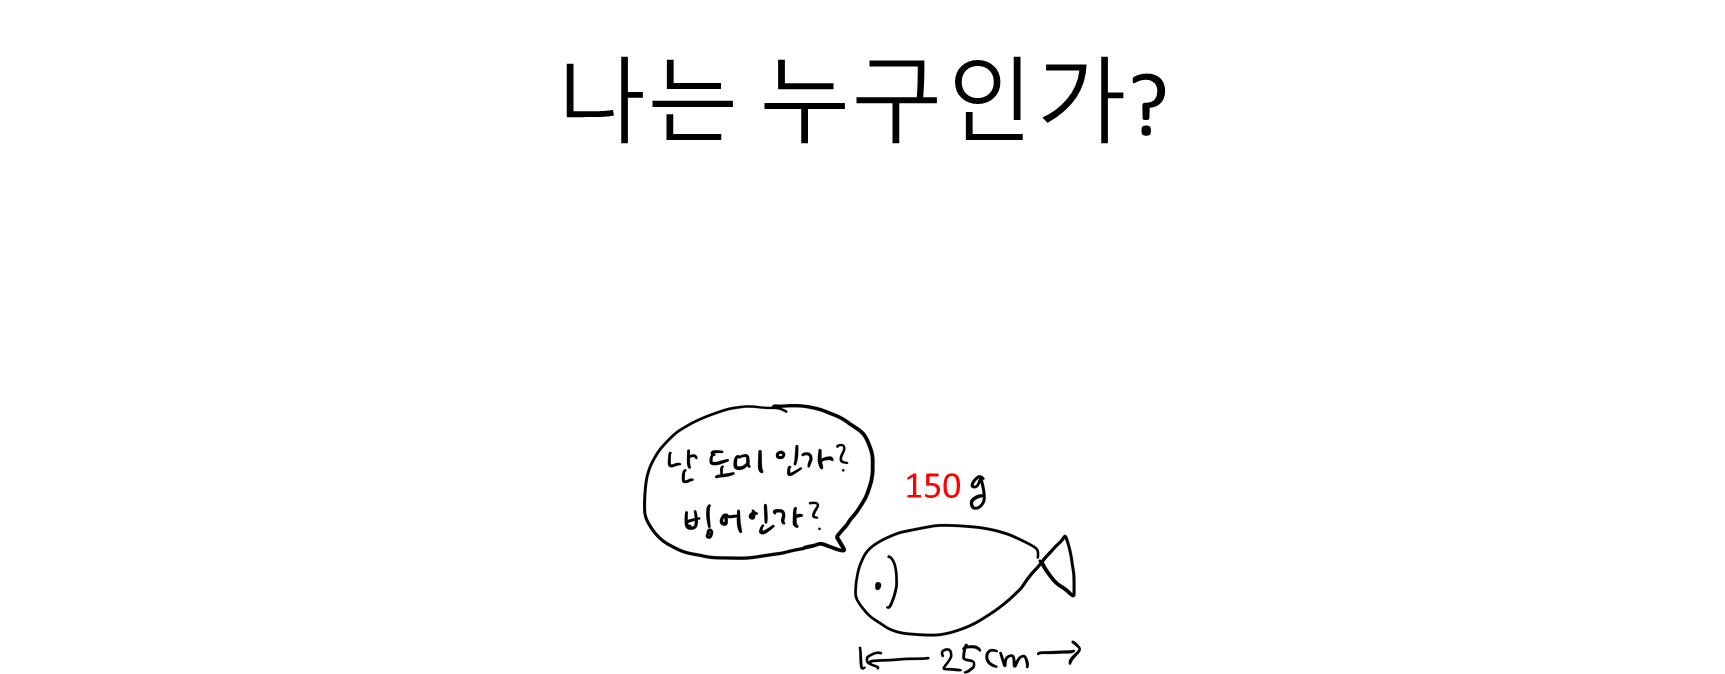

### 데이터 준비
---
- http://bit.ly/bream_smelt
- 생선 데이터 : 49개의 샘플

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

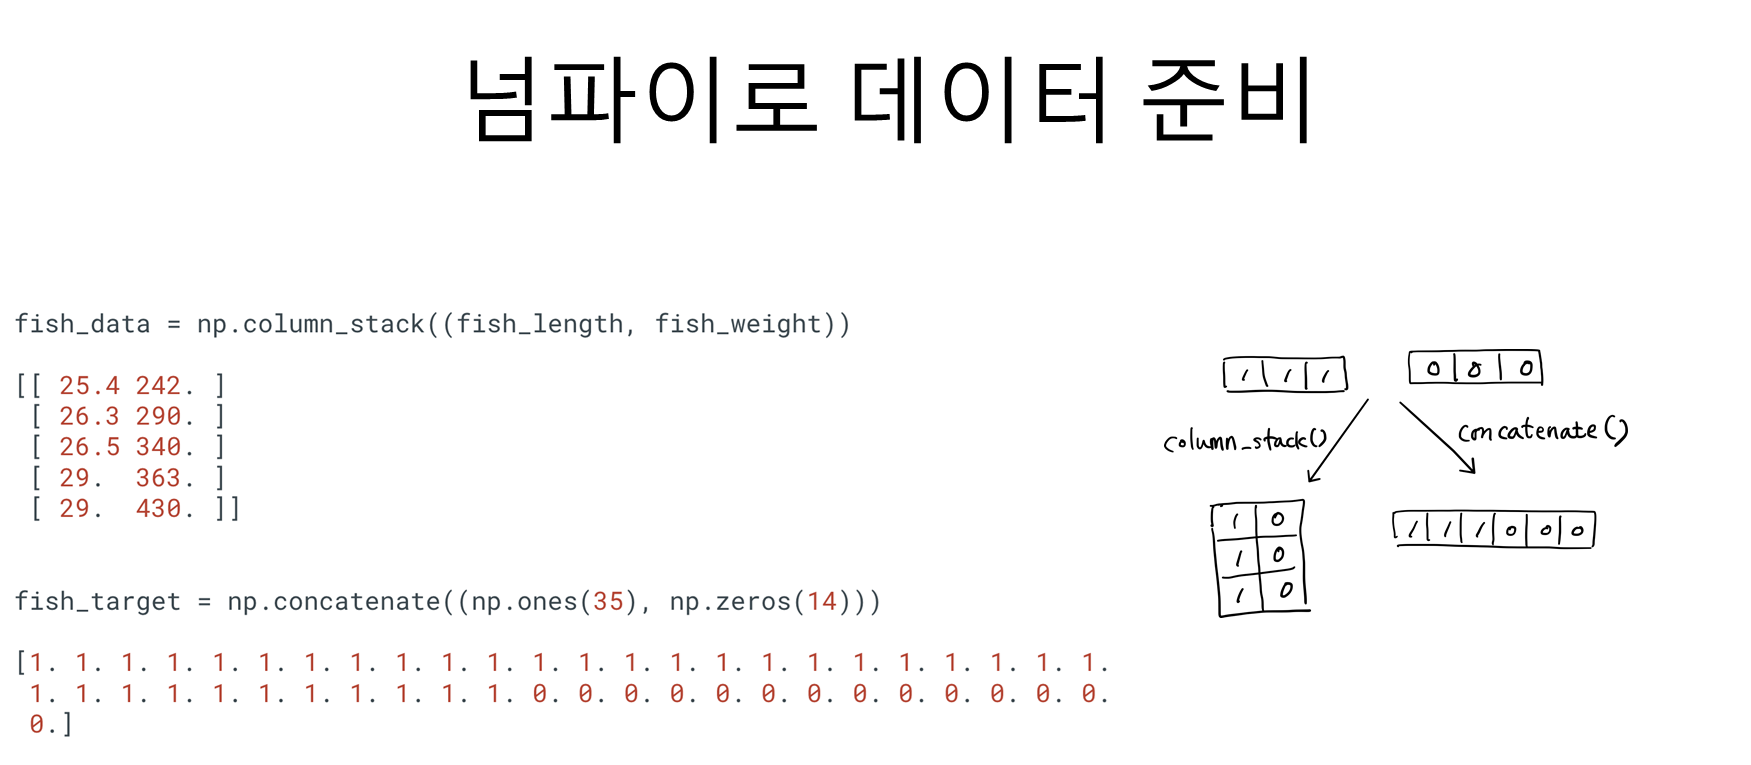

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기
---
- 사이킷런은 모델을 위한 알고리즘뿐만 아니라 다양한 유틸리티 도구도 제공
- train_test_split() : 훈련 세트와 테스트 세트 나누기
- strartify=target : 타깃 클래스 비율 동일하게 맞추기

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [15]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리
---
- length:25, weight:150 생선 예측하기

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [17]:
print(kn.predict([[25, 150]]))

[0.]


In [18]:
import matplotlib.pyplot as plt

**산포도로 위치 확인**

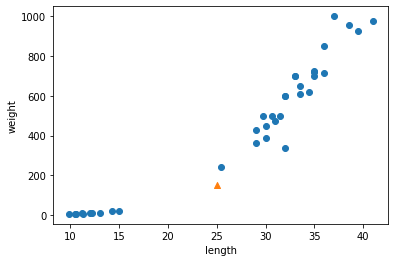

In [19]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**kneighbors()메서드로 거리값 확인**

In [20]:
distances, indexes = kn.kneighbors([[25, 150]])

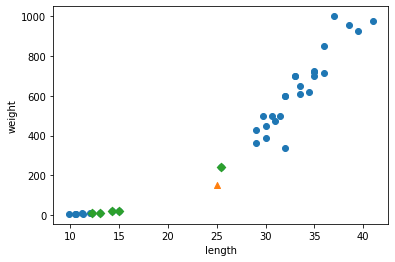

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


> **왜 빙어 일까요?**

## 데이터 전처리 data preprocssing
---
- 데이터 스케일링
- 결측치, 이상치 처리
- 원 핫 인코딩
- 클래스 라벨 설정

### 기준을 맞춰라 : 스케일 scale
---
- x축은 범위가 좁고, y축은 범위가 넓음
- 두 특성의 범위가 다른 것을 두 특성의 스케일이 다르다고 함
- 알고리즘이 거리 기반일 때 중요
- 트리 기반 알고리즘들은 스케일이 달라도 잘 동작 함
- 표준점수 standard score (z 점수) 사용

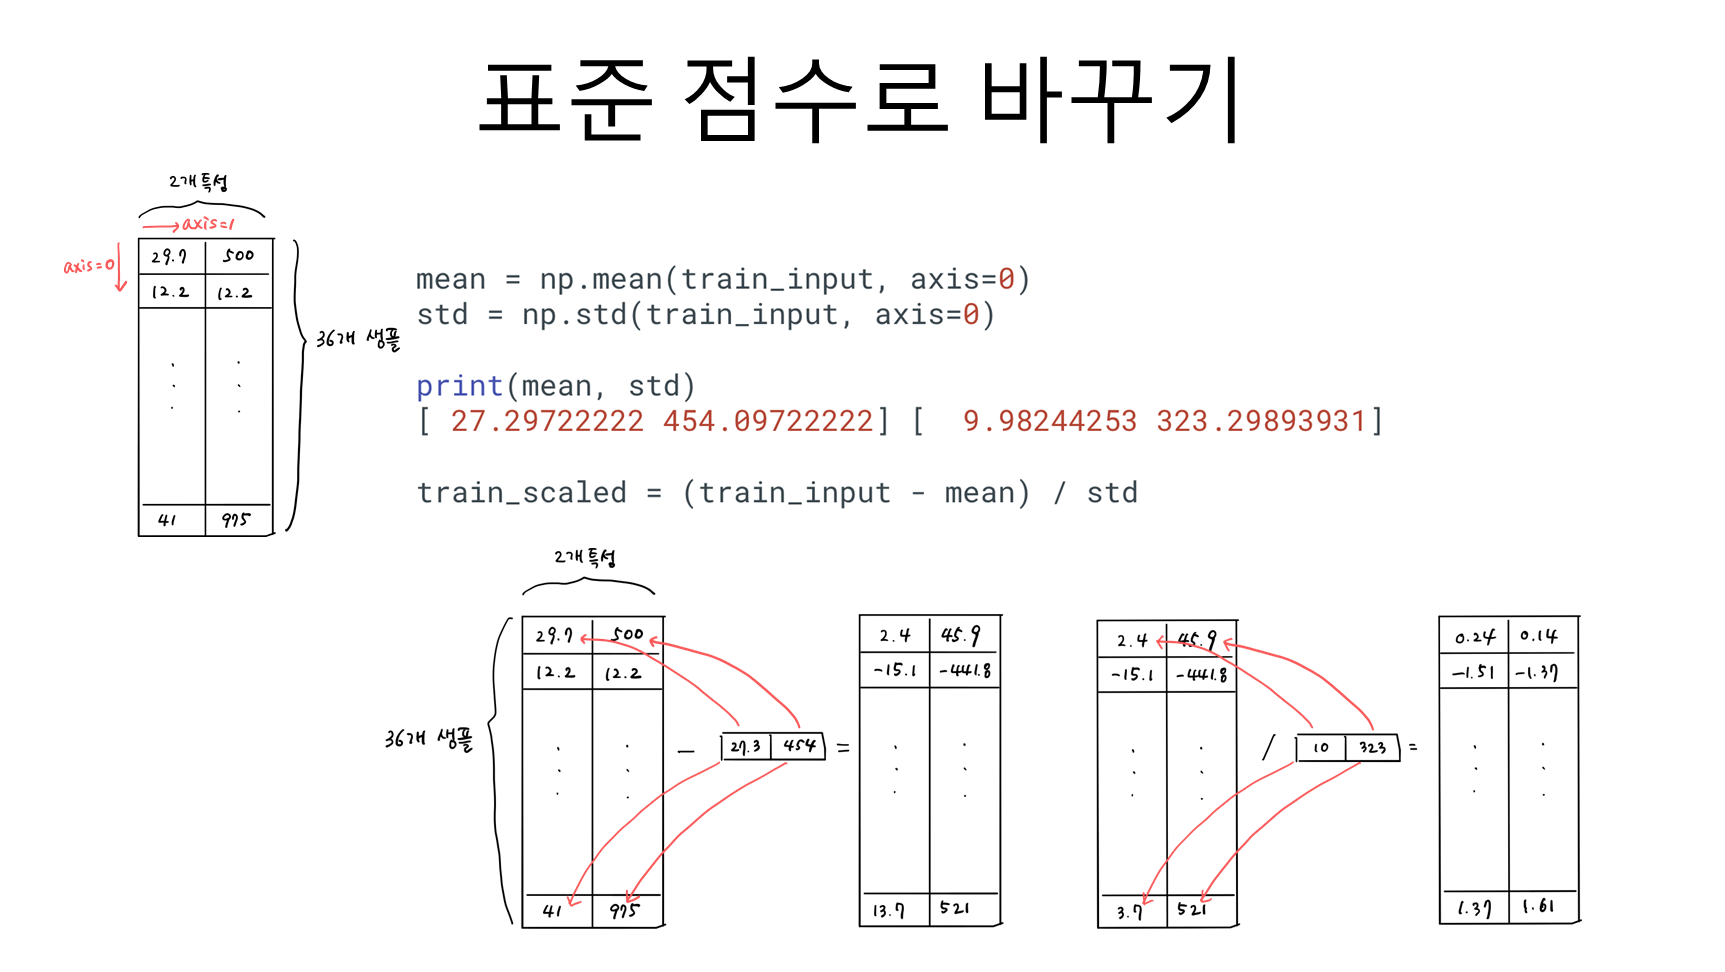

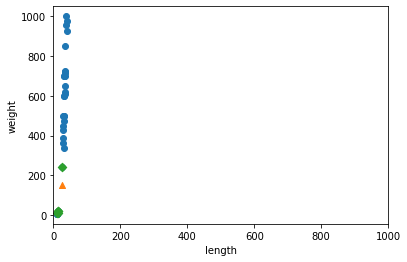

In [22]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [25]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [26]:
train_scaled = (train_input - mean) / std

## 전처리 데이터로 모델 훈련하기

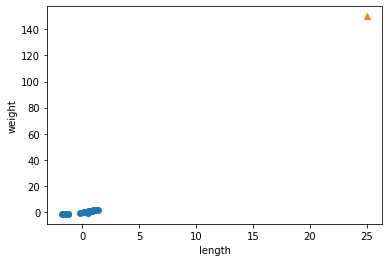

In [27]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
# 표준 점수로 스케일링
new = ([25, 150] - mean) / std

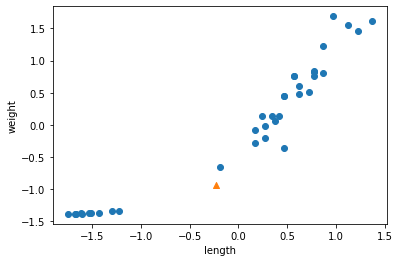

In [29]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

> **훈련 세트의 평균과 표준편차로 테스트 세트를 스켈링 해야함**

In [31]:
test_scaled = (test_input - mean) / std

In [32]:
kn.score(test_scaled, test_target)

1.0

In [33]:
print(kn.predict([new]))

[1.]


In [34]:
distances, indexes = kn.kneighbors([new])

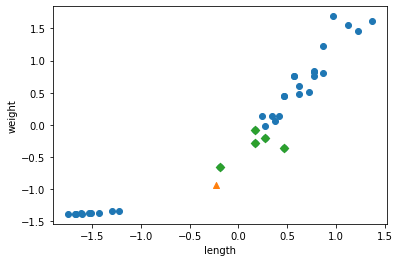

In [35]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 마무리
---

### 키워드
---

- 데이터 전처리 : 머신런닝 모델에 훈련 데이터를 훈련하기 전에 가공하는 단계, 전처리에 많은 시간이 소요 됨
- 표준 점수 : 스케일링을 바꾸는 대표적인 방법 중 하나. 반드시 훈련 세트의 평균과 표준편차로 테스트 세트를 스켈링 해야 함

### 핵심 패키지와 함수
---

#### scikit-learn
- train_test_split(test_size=0.25) : 훈련데이터를 훈련 세트와 테스트 세트로 나눠주는 함수
- test_size : 나누는 비율, 기본값 0.25(25%)
- kneighbors() : k-최근접이웃 클래스 메서드, 입력 데이터에서 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스 반환